This file just does some basic loading of the data and creates a few plots from the raw data.

The loading of the data has been moved into its own function in helpers.py, see below for usage.

Data "Solar Power Generation Data" from: https://www.kaggle.com/datasets/anikannal/solar-power-generation-data

# Loading data
This block just loads the data for both plants.

The datetimes are converted to numpy datetime64.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import os
import sys
module_path = os.path.abspath(".")
sys.path.insert(0, module_path)
from helpers import load_data

plant1, plant2, weather1, weather2 = load_data()

# Weather data

In [3]:
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


## Temperature plots

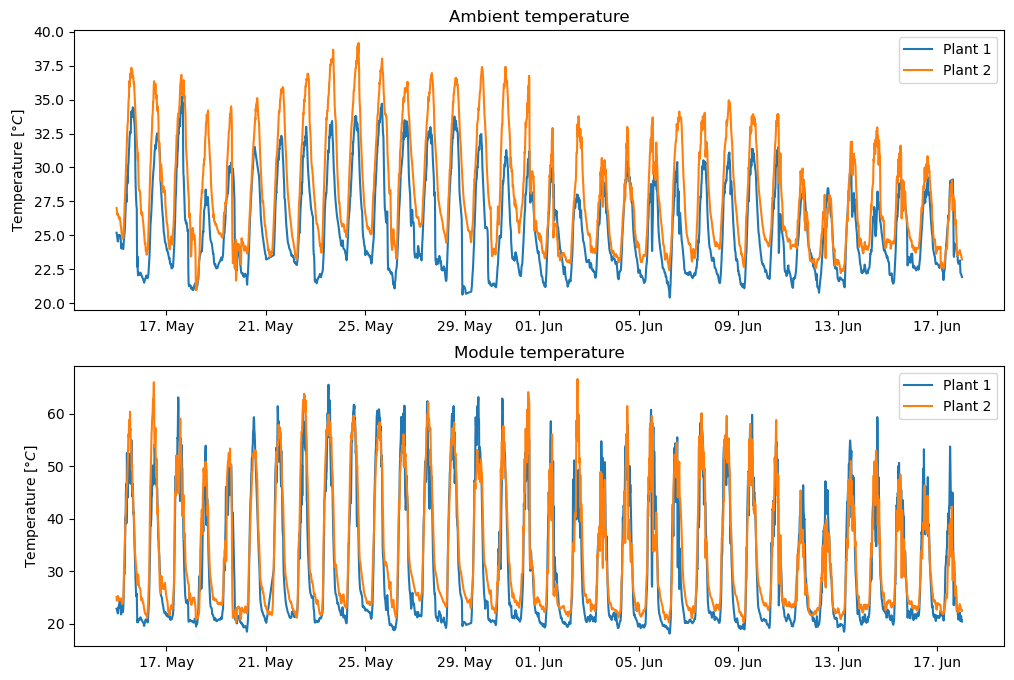

In [4]:
plt.figure(figsize=(12, 8))

# Ambient temperature plot
plt.subplot(2, 1, 1)
plt.title("Ambient temperature")
plt.ylabel(r"Temperature $[\degree C]$")
plt.plot(weather1["DATE_TIME"], weather1["AMBIENT_TEMPERATURE"], label="Plant 1")
plt.plot(weather2["DATE_TIME"], weather2["AMBIENT_TEMPERATURE"], label="Plant 2")
plt.legend()
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))

# Module temperature plot
plt.subplot(2, 1, 2)
plt.title("Module temperature")
plt.ylabel(r"Temperature $[\degree C]$")
plt.plot(weather1["DATE_TIME"], weather1["MODULE_TEMPERATURE"], label="Plant 1")
plt.plot(weather2["DATE_TIME"], weather2["MODULE_TEMPERATURE"], label="Plant 2")
plt.legend()
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))


## Irradiation plot

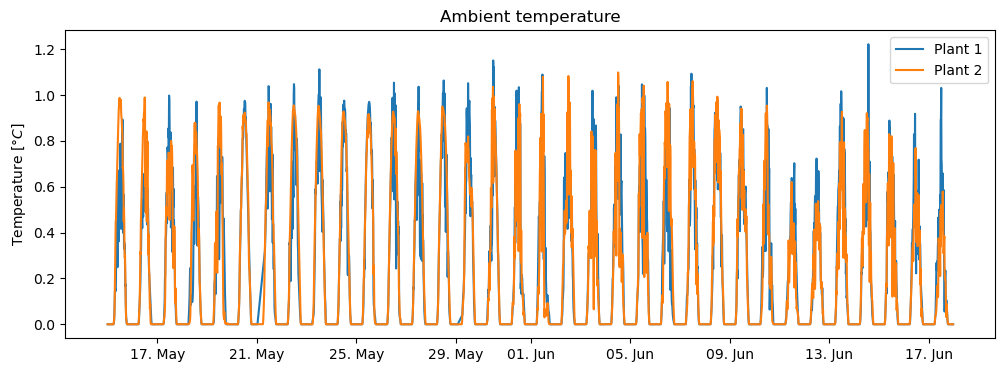

In [5]:
plt.figure(figsize=(12, 4))

# Irradiation plot
plt.title("Ambient temperature")
plt.ylabel(r"Temperature $[\degree C]$")
plt.plot(weather1["DATE_TIME"], weather1["IRRADIATION"], label="Plant 1")
plt.plot(weather2["DATE_TIME"], weather2["IRRADIATION"], label="Plant 2")
plt.legend()
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))

# Plant data

The plant data set consist of:
- DATE_TIME
- PLANT_ID
- SOURCE_KEY
- DC_POWER
- AC_POWER
- DAILY_YIELD
- TOTAL_YIELD

In [6]:
plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


How many inverters do we have on each plant?

In [7]:
inverters1 = plant1["SOURCE_KEY"].nunique()
inverters2 = plant2["SOURCE_KEY"].nunique()
print(f"Plant 1 has {inverters1} inverters, and plant 2 has {inverters2} inverters.")

Plant 1 has 22 inverters, and plant 2 has 22 inverters.


## Power plots

Below plots the AC & DC power for each inverter for plant 1, during a single day. The interval can be changed in the plt.xlim() function, or removed for plotting of the entire dataset.

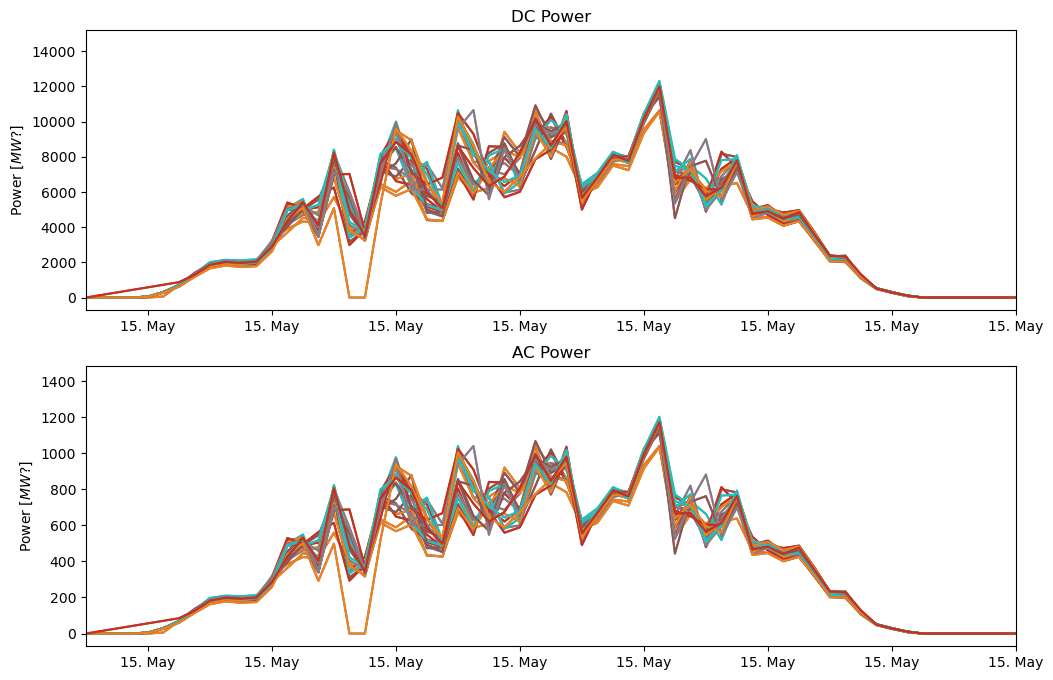

In [8]:
plt.figure(figsize=(12, 8))

for i, key in enumerate(plant1["SOURCE_KEY"].unique()):
    inverter = plant1[plant1["SOURCE_KEY"] == key]
    time = inverter["DATE_TIME"]
    dc_power = inverter["DC_POWER"]
    ac_power = inverter["AC_POWER"]
    
    # Ambient temperature plot
    plt.subplot(2, 1, 1)
    plt.title("DC Power")
    plt.ylabel(r"Power $[MW?]$")
    plt.plot(time, dc_power)
    plt.plot(time, dc_power)
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))
    plt.xlim(np.datetime64("2020-05-15T05:00:00"), np.datetime64("2020-05-15T20:00:00"))
    
    # Module temperature plot
    plt.subplot(2, 1, 2)
    plt.title("AC Power")
    plt.ylabel(r"Power $[MW?]$")
    plt.plot(time, ac_power)
    plt.plot(time, ac_power)
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))
    plt.xlim(np.datetime64("2020-05-15T05:00:00"), np.datetime64("2020-05-15T20:00:00"))

# Andis ML tests

In [9]:

# OBS Some code are copied from Kaggle https://www.kaggle.com/code/tobi4tech/solar-power-generation-forecast-with-different-ml

plant1.info()
print("\n ########## \n")
plant2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB

 ########## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3

In [10]:
weather1.info()
print("\n ########## \n")
weather2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB

 ########## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   S

In [11]:


plant1_tot_data=pd.merge(plant1.drop(columns=["PLANT_ID"]), weather1.drop(columns=["PLANT_ID","SOURCE_KEY"]), on="DATE_TIME")
plant1_tot_data['HOUR'] = pd.to_datetime(plant1_tot_data['DATE_TIME'].astype(str)).dt.hour+(pd.to_datetime(plant1_tot_data['DATE_TIME'].astype(str)).dt.minute)/60
plant1_tot_data['MIDDAYNESS'] = abs(12-abs(plant1_tot_data['HOUR']-12)) 
    # Only maybe use MIDDAYNESS. It has better correlations with power generation than HOUR
    # Or maybe use polynomial features - preprocessing on HOURS???
display(plant1_tot_data)
display(plant1_tot_data.isnull().sum())
display(plant1_tot_data.count())
display(plant1_tot_data.describe())

# display(plant1_tot_data[10000+100:10050+100])
# print("\n ########## \n")

# plant2_tot_data=pd.merge(plant2.drop(columns=["PLANT_ID"]), weather2.drop(columns=["PLANT_ID","SOURCE_KEY"]), on="DATE_TIME")
# display(plant2_tot_data)
# display(plant2_tot_data.isnull().sum())
# display(plant1_tot_data.count())
# display(plant1_tot_data.describe())

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MIDDAYNESS
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,0.00,0.00
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,0.00,0.00
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,0.00,0.00
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,0.00,0.00
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,23.75,0.25
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,23.75,0.25
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,23.75,0.25
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,23.75,0.25


DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
HOUR                   0
MIDDAYNESS             0
dtype: int64

DATE_TIME              68774
SOURCE_KEY             68774
DC_POWER               68774
AC_POWER               68774
DAILY_YIELD            68774
TOTAL_YIELD            68774
AMBIENT_TEMPERATURE    68774
MODULE_TEMPERATURE     68774
IRRADIATION            68774
HOUR                   68774
MIDDAYNESS             68774
dtype: int64

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MIDDAYNESS
count,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000
mean,3147.177450,307.778375,3295.834644,6.978728e+06,25.558521,31.244997,0.232305,11.941918,6.073567
std,4036.441826,394.394865,3145.220597,4.162707e+05,3.361300,12.308283,0.301948,6.867833,3.470934
min,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.512007e+06,22.724491,21.123944,0.000000,6.000000,3.000000
50%,428.571429,41.450000,2658.473214,7.146685e+06,24.670178,24.818984,0.031620,12.000000,6.250000
75%,6365.468750,623.561161,6274.000000,7.268751e+06,27.960429,41.693659,0.454880,17.750000,9.000000
max,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652,23.750000,12.000000


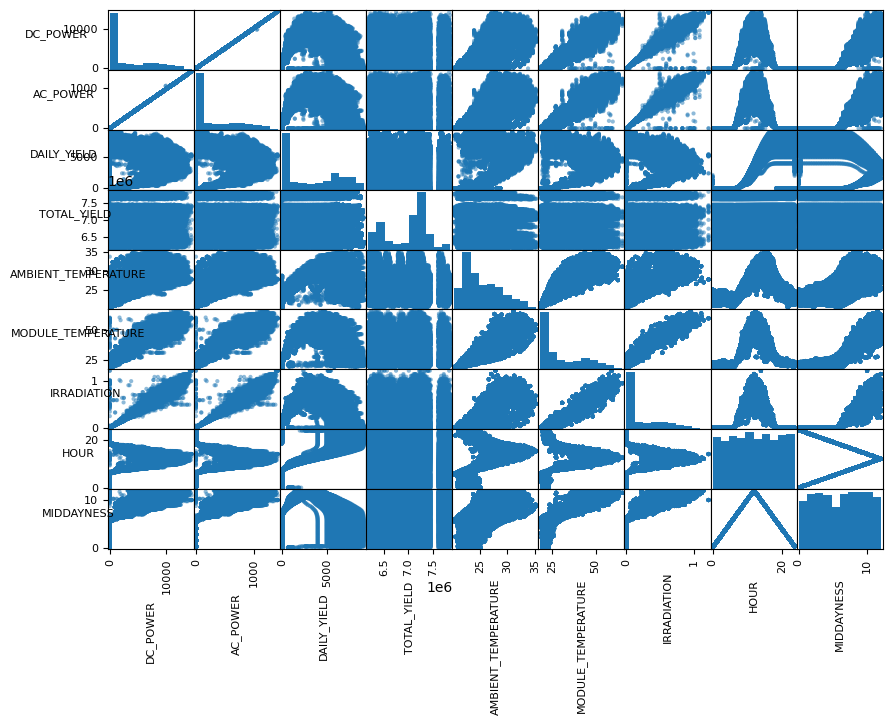

In [12]:

# from pandas.plotting import scatter_matrix
axes = pd.plotting.scatter_matrix(plant1_tot_data, figsize=(10,7))
[ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 90) for ax in axes.ravel()]
[ax.set_ylabel(ax.get_ylabel(), fontsize = 8, rotation = 0) for ax in axes.ravel()]
plt.show()


C:\Users\andir\AppData\Local\Temp\ipykernel_14508\385972341.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plant1_tot_data.drop(columns=["SOURCE_KEY"]).columns, rotation=90, fontsize=10)
C:\Users\andir\AppData\Local\Temp\ipykernel_14508\385972341.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plant1_tot_data.drop(columns=["SOURCE_KEY"]).columns, fontsize=10)


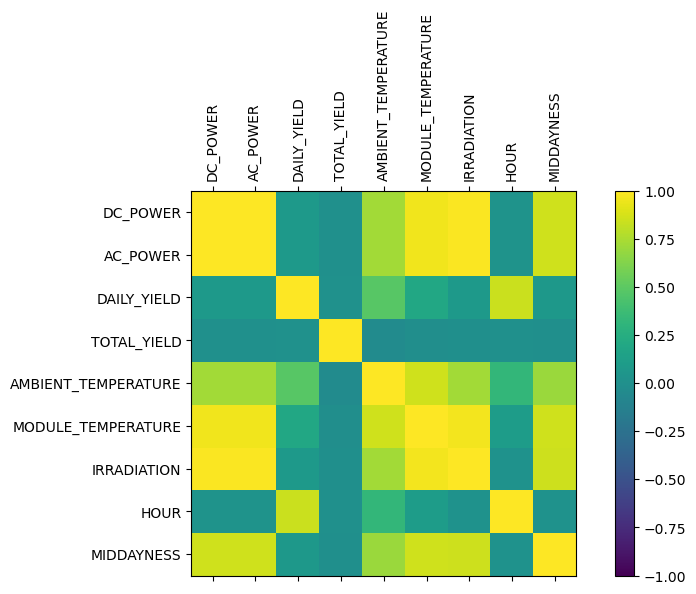

C:\Users\andir\AppData\Local\Temp\ipykernel_14508\385972341.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MIDDAYNESS
DC_POWER,1.00,1.00,0.08,0.00,0.72,0.95,0.99,0.02,0.85
AC_POWER,1.00,1.00,0.08,0.00,0.72,0.95,0.99,0.02,0.85
DAILY_YIELD,0.08,0.08,1.00,0.01,0.48,0.20,0.08,0.84,0.06
TOTAL_YIELD,0.00,0.00,0.01,1.00,-0.04,-0.02,-0.01,0.01,-0.00
AMBIENT_TEMPERATURE,0.72,0.72,0.48,-0.04,1.00,0.86,0.73,0.33,0.70
MODULE_TEMPERATURE,0.95,0.95,0.20,-0.02,0.86,1.00,0.96,0.11,0.86
IRRADIATION,0.99,0.99,0.08,-0.01,0.73,0.96,1.00,0.02,0.85
HOUR,0.02,0.02,0.84,0.01,0.33,0.11,0.02,1.00,0.02
MIDDAYNESS,0.85,0.85,0.06,-0.00,0.70,0.86,0.85,0.02,1.00


In [13]:

correlations = plant1_tot_data.corr()
# plot correlation matrix 
    # Made this way, underneath, to get more option, like colorbar. -Andi
fig = plt.figure(figsize=(10, 5)) # Create empty figure.
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticklabels(plant1_tot_data.drop(columns=["SOURCE_KEY"]).columns, rotation=90, fontsize=10)
ax.set_yticklabels(plant1_tot_data.drop(columns=["SOURCE_KEY"]).columns, fontsize=10)
# Note that the column "SOURCE_KEY" is automatically obmitted, since it is not numerical values.
plt.show()

# Or just use:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


In [57]:
# Change later. Copied directly from Kaggle, just to see results, and see whether I get  close to the same result

#Dropping parameters, not usable for predicting AC_POWER
# plant1_tot_data_short=plant1_tot_data.drop(['DATE_TIME','SOURCE_KEY','DC_POWER','DAILY_YIELD','TOTAL_YIELD'],axis=1)

feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR']
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'MIDDAYNESS']
X = plant1_tot_data[feature_names]
y = plant1_tot_data['AC_POWER']

display(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


#Making scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Fitting scaler to the data
scaler.fit(X_test)

#Transform the data to normal distributions
X_test=pd.DataFrame(scaler.transform(X_test))
X_train=pd.DataFrame(scaler.transform(X_train))

display(X_test)



,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,25.184316,22.857507,0.0
1,25.184316,22.857507,0.0
2,25.184316,22.857507,0.0
3,25.184316,22.857507,0.0
4,25.184316,22.857507,0.0
...,...,...,...
68769,21.909288,20.427972,0.0
68770,21.909288,20.427972,0.0
68771,21.909288,20.427972,0.0
68772,21.909288,20.427972,0.0


,0,1,2
0,1.391744,1.687118,1.974073
1,-0.521415,-0.662724,-0.762202
2,0.555546,0.829092,0.625532
3,-0.828388,-0.846167,-0.769243
4,0.282752,-0.121743,-0.556267
...,...,...,...
13750,-1.130466,-0.889852,-0.769243
13751,-0.452780,-0.631858,-0.739665
13752,-0.952195,-0.842954,-0.769243
13753,0.468261,-0.530212,-0.768913


In [38]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_score = lr_model.score(X_test, y_test)
print(f"Linear regression score is {lr_score*100:.4f} %")

Linear regression score is 98.0029 %


In [39]:
# Change later. Copied directly from Kaggle, just to see results, and see whether I get  close to the same result
# Can use gridsearch and cross-validation instead of for-loop. NOTE this is just copied
from sklearn import neighbors

score_list = []
n_neighbors_list = []

# for loop to find best fitting n_neighbor value
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Best n_neighbor at {best_n_neighbor} with {max(score_list)*100:.4f} %")

Best n_neighbor at 20 with 98.6593 %


Score is 98.6513 %
{'max_depth': 7, 'min_impurity_decrease': 0.0}
0.9841073465614651


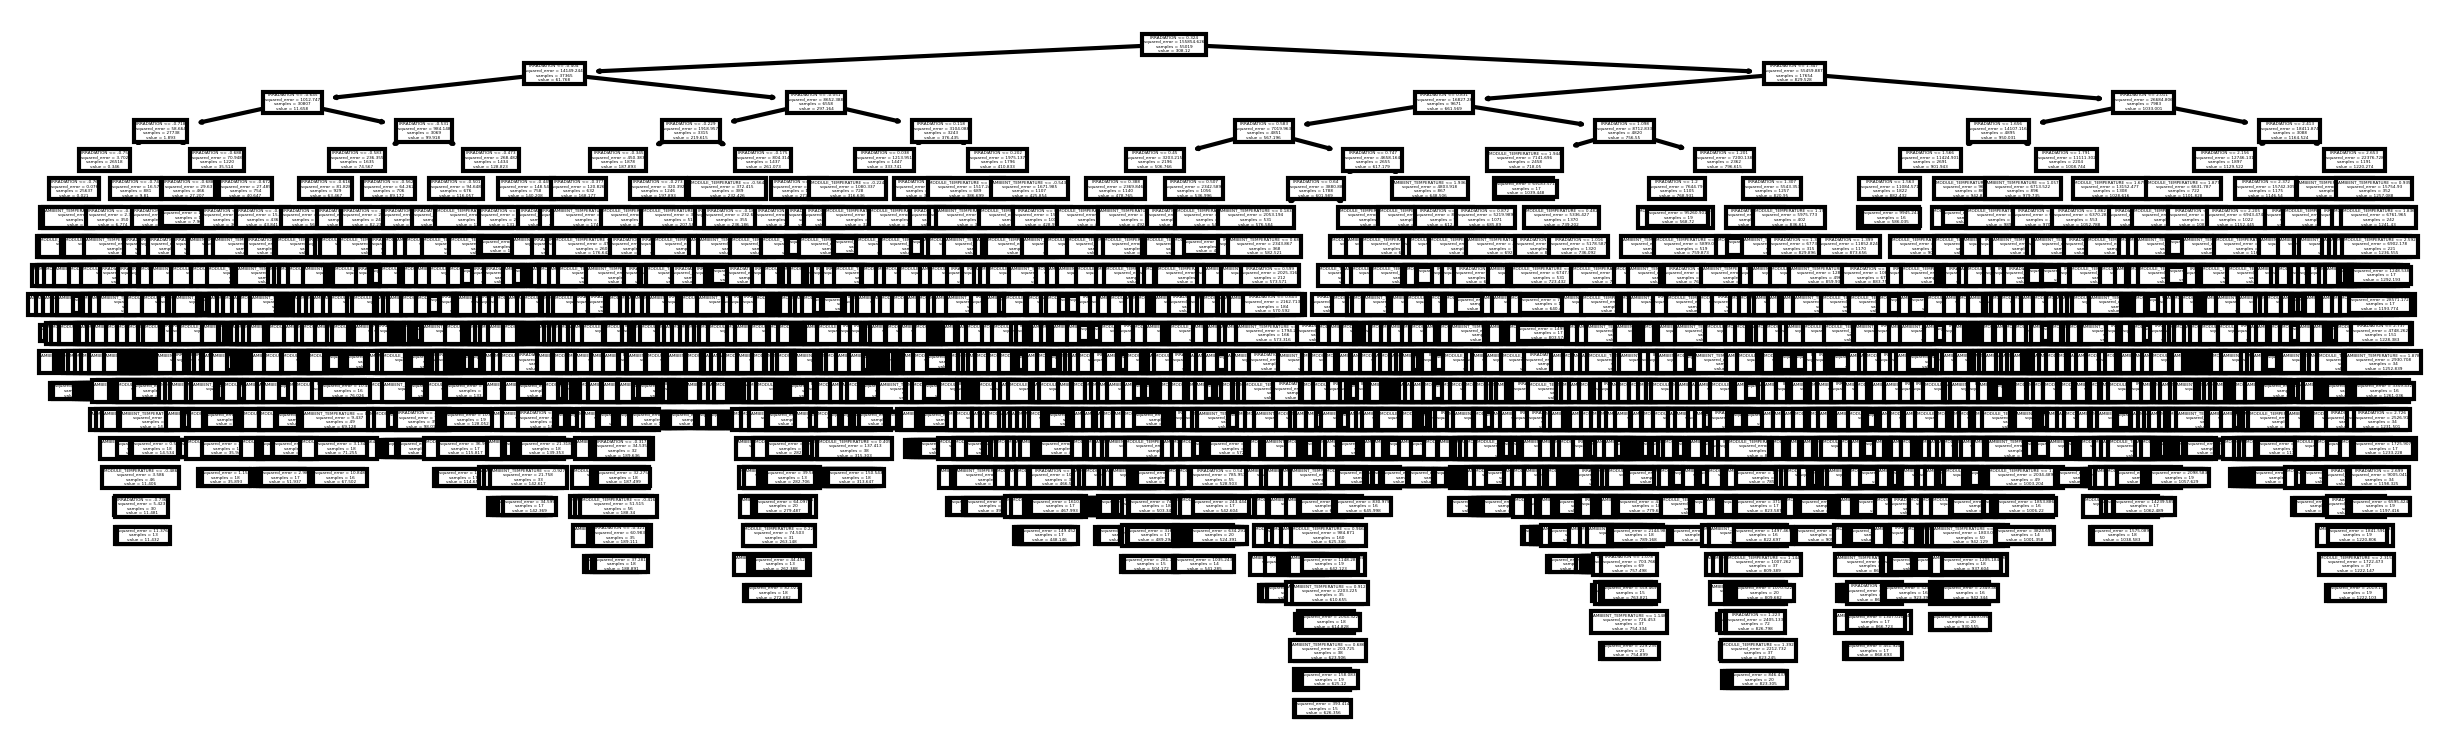

In [58]:
# Change later. Copied directly from Kaggle, just to see results, and see whether I get  close to the same result
# Can change more settings for decision tree

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_impurity_decrease=0.0, max_depth=None,  random_state=42)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")


from sklearn.tree import plot_tree
# plt.figure(figsize=(10, 3), dpi=300)
# tree_dot = plot_tree(dtr, feature_names=feature_names) # Takes >2min to plot


from sklearn.model_selection import GridSearchCV
# knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
# param_grid = {'min_impurity_decrease': range(0, 10), 'max_depth': range(2, 8)}
# grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
param_grid = {'min_impurity_decrease': np.linspace(0.0, 0.5, num=6), 'max_depth': range(2, 8)} 
    # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))






Score is 97.4877 %


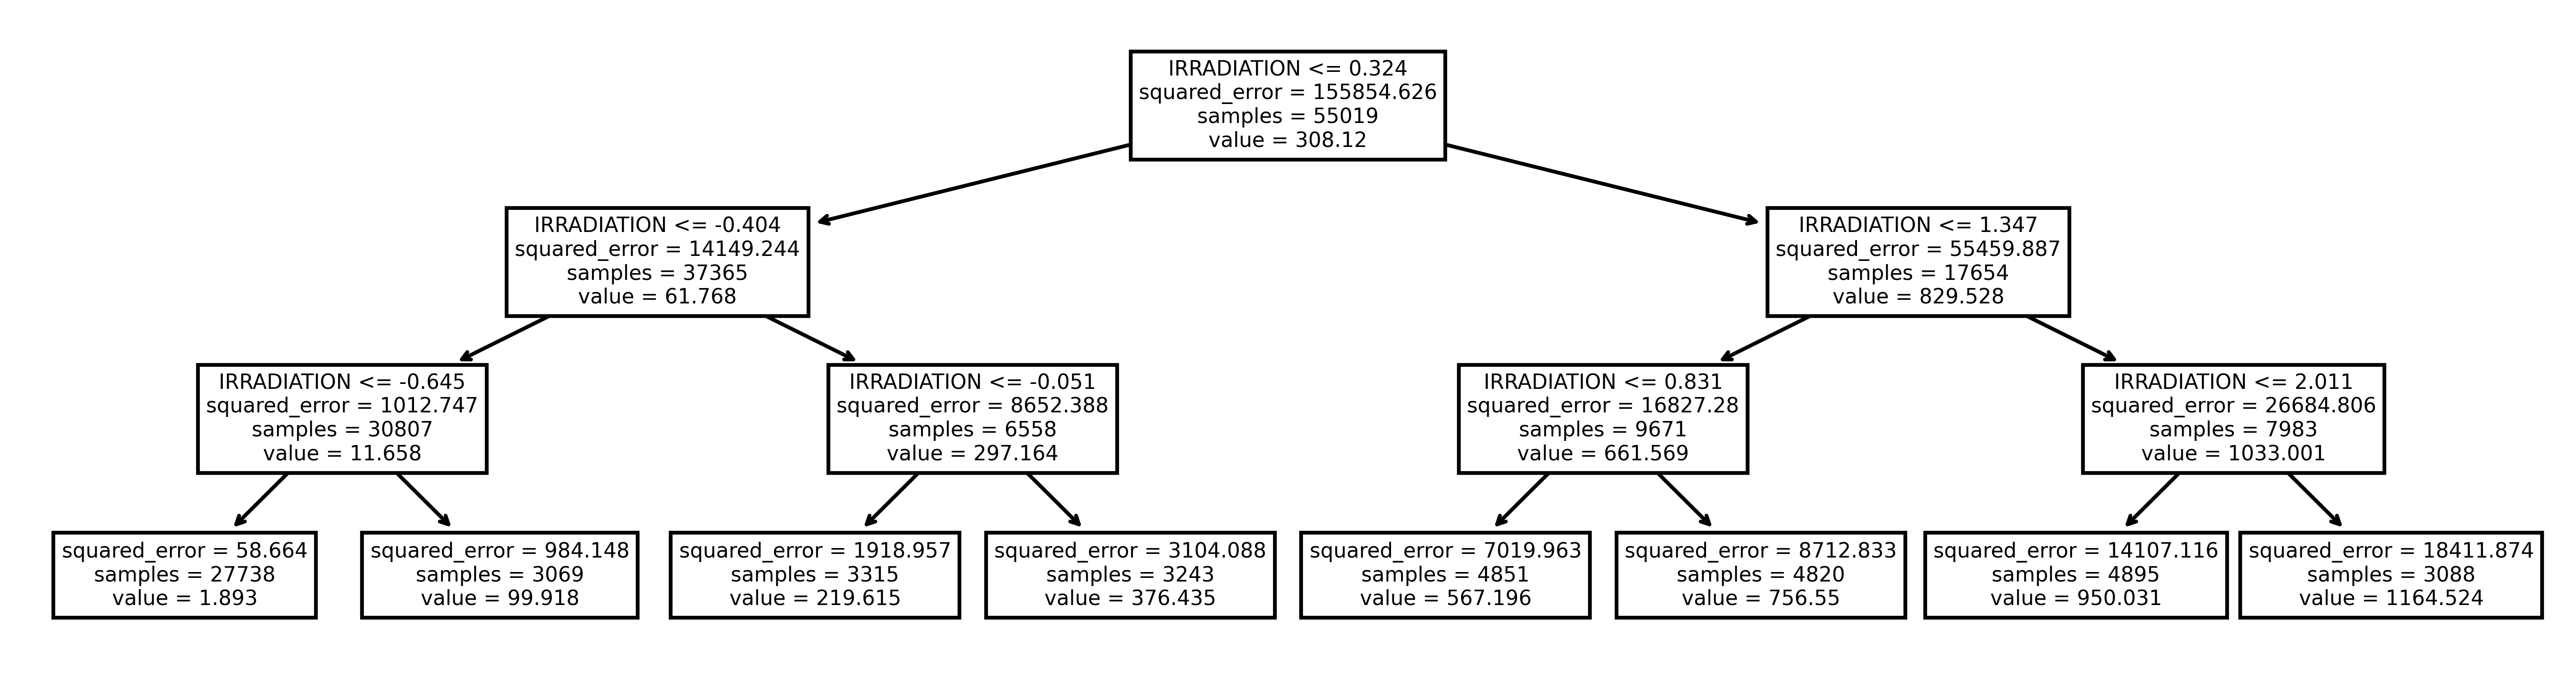

In [74]:
dtr = DecisionTreeRegressor(min_impurity_decrease=15, max_depth=3,  random_state=42)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")

plt.figure(figsize=(12, 3), dpi=600)
tree_dot = plot_tree(dtr, feature_names=feature_names)



In [41]:
# Change later. Copied directly from Kaggle, just to see results, and see whether I get  close to the same result
# Can change more settings for decision tree / random forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.0, max_depth=None,  random_state=42)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")

Score is 98.6483 %
